# Theorie

## Multi-Layer-Perzeptron (MLP)
Ein MLP ist ein relativ einfaches neuronales Netz, welches aus einer Eingabe-, mehreren versteckten und einer Ausgabeschicht besteht. Die Schichten sind dabei vollständig vernetzt, d.h. jedes Neuron der vorherigen Schicht ist mit jedem Neuron der nachfolgenden Schicht verbunden [[Biso19]](#Quellen). In Abb. 1 ist ein einfaches MLP zu sehen, aus welchem diese Struktur deutlich hervorgeht.

![Deep Feedforward Neural Network](MLP.png)
Abb. 1: Darstellung eines MLP aus [[Biso19, Fig. 31-1]](#Quellen)

Der Nachteil dieser Netzarchitektur ist die relativ schlechte Skalierung für große Eingaben. Dies wird im Folgenden auch in Übung 2 deutlich.

## Convolutional Neural Network (CNN)
Ein CNN ist eine Erweiterung der MLP. Bei diesen werden Convolutional Layer eingeführt, welche sich auf ein lokales Subset der Eingabedaten begrenzt. Hierbei können dann lokale Merkmale besser extrahiert werden. Da dies nach dem Vorbild der Neuronen im visuellen Kortex des Gehirns gestaltet ist, sind diese Netzwerke sehr gut für Bilderkennungsanwendungen geeignet [[Biso19]](#Quellen). Ein allgemeiner Überblick über den typischen Aufbau ist in Abb. 2 zu sehen.

![CNN](CNN.png)
Abb. 2: Überblick über ein typisches CNN aus [[Biso19, Fig. 35-15]](#Quellen)

Im Gegensatz zu den verdeckten Schichten im MLP sind diese Layer nicht vollständig miteinander vernetzt (vgl. Abb. 3), sondern konzentrieren sich auf die lokale Nachbarschaft. Dies wird über sogenannte Pooling-Schichten erledigt, welche die Bilddaten zusammenfassen und dadurch auch den Rechenaufwand reduzieren [[Biso19]](#Quellen).

![Convolutional Layer](Convolutional.png)
Abb. 3: Ein Convolutional Layer im Überblick aus [[Biso19, Fig. 35-5]](#Quellen)

# Übung 1

## Training und Klassifizierung mit einem MLP

In der ersten Übung soll ein MLP (Multilayer Perceptron) trainiert werden, welches Bilder von Ziffern erkennen soll.
Hierfür verwenden wir die Python-Bibliothek scikit-learn und den MNIST Datensatz.

Scikit-learn ist ein Machine-Learning-Framework, welches sich an Laien richtet und daher eine vereinfachte API, auf Kosten von Geschwindigkeit und Features, anbietet. Es ist daher eher für einfachere, kleine Problemstellungen geeignet [[F++11]](#Quellen).

Im ersten Schritt importieren wir zunächst die benötigten Module.

In [14]:
# Methode, um den Datensatz herunterzuladen
from sklearn.datasets import fetch_openml
# Methode, um den Datensatz in Trainings- und Testdaten zu teilen
from sklearn.model_selection import train_test_split
# Das MLP
from sklearn.neural_network import MLPClassifier

Danach holen wir uns den MNIST Datensatz von OpenML und Normalisieren die Werte auf die Spanne 0-1 (Der Datensatz besteht aus 70000 28x28 Grayscale Pixeln mit Werten zwischen 0 und 255).

Aus diesem vorbereiteten Datensatz wählen wir nun Trainings- und Testdaten mit einem 80-20 Split.

In [15]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True,
                    as_frame=False)  # 70.000 Ziffernbilder 28x28
X = X / 255.0  # Normalisierung (0-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hierbei steht X für die Werte und y für die Labels bzw. Klassen, die den Werten zugeordnet sind.

Im nächsten Schritt erstellen wir nun das MLP und trainieren dieses (Dauer ca. 30s). Hierbei hat die verdeckte schicht 50 Neuronen und wir trainieren für maximal 10 Epochen. Hierbei verwenden wir ausschließlich die Trainingsdaten.

In [16]:
# MLP definieren und trainieren
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
clf.fit(X_train, y_train)

C:\Users\jmal\Documents\OTH\SEM11\KPL\KT\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)

Nachdem wir das Netzwerk trainiert haben, können wir nun die Bilder mithilfe unseres Netzwerks klassifizieren. Da wir auch die Labels zu diesen haben, können wir auch die Genauigkeit bestimmen.

Hierbei bietet es sich an, die Genauigkeit von Trainings- und Testdaten separat zu erfassen, da hierdurch die Fähigkeit des Netzwerks, unbekannte Bilder zu klassifizieren, bewertet werden kann.

In [17]:
# Modellbewertung
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f"Trainingsgenauigkeit: {train_acc:.2f}, Testgenauigkeit: {test_acc:.2f}")

Trainingsgenauigkeit: 0.98, Testgenauigkeit: 0.96


Hier ist zu sehen, dass trotz der relativ kurzen Trainingsphase bereits gute Ergebnisse in der Klassifikation sowohl bekannter als auch unbekannter Ziffernbilder erzielt werden kann.

(Referenzwerte für Fehlschlag der Live-Demo: Trainingsgenauigkeit 0.96, Testgenauigkeit 0.94)

## Visualisierung
Nun können wir auch den Lernfortschritt visualisieren. Hierfür erstellen wir ein neues MLP und verwenden jetzt die Methode `partial_fit` anstelle der Methode `fit`, um nach den einzelnen Epochen den aktuellen Trainingsstatus zu erhalten.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Neues MLP erzeugen
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
history_train = []
history_test = []

for i in range(1, clf.max_iter + 1):
    # Partielles fitting auf den Trainingsdaten. Hierbei wird das Modell schrittweise erweitert.
    # Die Angabe von classes gibt alle möglichen Labels an. Dies ist notwendig, damit das Modell auch dann korrekt ist, wenn die Trainingsdaten einer Epoche mal nicht alle Labels enthalten.
    clf.partial_fit(X_train, y_train, classes=np.unique(y))
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    history_train.append(train_acc)
    history_test.append(test_acc)

Die Daten werden in dem jeweiligen History-Array abgespeichert. Diese können wir nun dafür nutzen, einen Plot der Lernkurve zu erstellen.

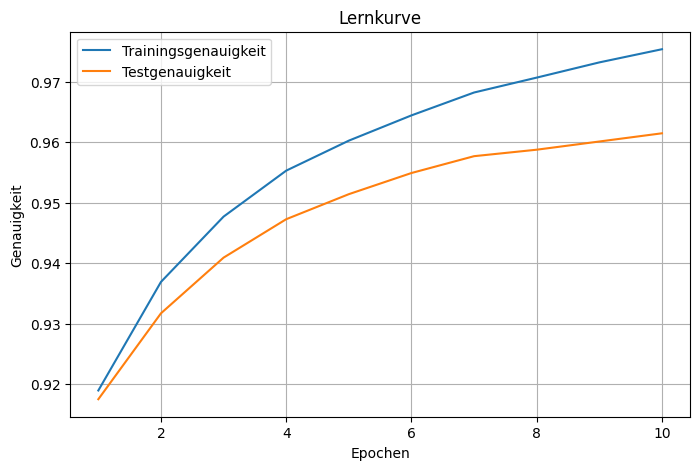

Letzte Trainingsgenauigkeit: 0.98
Letzte Testgenauigkeit: 0.96


In [19]:
# Lernkurve anzeigen
plt.figure(figsize=(8, 5))
plt.plot(range(1, clf.max_iter + 1), history_train, label='Trainingsgenauigkeit')
plt.plot(range(1, clf.max_iter + 1), history_test, label='Testgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.title('Lernkurve')
plt.legend()
plt.grid(True)
plt.show()

# Letzte Trainings- und Testgenauigkeit ausgeben
print(f"Letzte Trainingsgenauigkeit: {history_train[-1]:.2f}")
print(f"Letzte Testgenauigkeit: {history_test[-1]:.2f}")

Wie in diesem Plot zu sehen ist, können bereits nach einer Epoche auf diesem relativ einfachen MLP bereits gute Ergebnisse erzielt werden. Zu sehen ist allerdings auch, dass die Trainings- und Testgenauigkeiten immer weiter auseinanderdriften und jede weitere Epoche die Genauigkeit nur noch schwächer verbessern kann.

# Übung 2

## Training und Klassifizierung mit einem CNN
In der zweiten Übung soll ein CNN (Convolutional Neural Network) trainiert werden, um verschiedene Objekte auf Farbbildern zu erkennen. Zudem soll in dieser Übung das Framework Tensorflow/Keras als eine Alternative zu dem MLPClassifier aus dem scikit-learn Framework aus Übung 1 nähergebracht werden.

Tensorflow wird im Allgemeinen in vielen KI-Anwendungen als Framework verwendet, da es mehr Features als scikit-learn bietet und sich besser für große Modelle eignet, unter anderem aufgrund der Möglichkeit zur Nutzung von GPUs sowie Techniken des Distributed Computings [[M++05]](#Quellen). Ein Beispiel hierfür sind LLMs, welche mit dem Programm Ollama auf eigener Hardware laufen können.

Für diese Übung wird zudem der CIFAR10 Datensatz, welcher 60000 32x32 Pixel Farbbilder enthält, welche in 10 Kategorien eingeteilt sind, verwendet.

Im ersten Schritt importieren wir wieder die nötigen Module.

In [20]:
# CIFAR10-Datensatz
from tensorflow.keras.datasets import cifar10
# Sequenzielles Modell aus Keras
from tensorflow.keras.models import Sequential
# Verschiedene Layer, aus welchen das Modell zusammengebaut wird
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
# Tools
from tensorflow.keras.utils import to_categorical

Im nächsten Schritt muss, wie auch schon in Übung 1, der Datensatz geladen, normalisiert und in Trainings- und Testdaten aufgeteilt werden.

Der CIFAR10-Datensatz hat diese Unterteilung bereits integriert, mit 5x10000 Bildern für das Training und einem weiteren Datensatz von 10000 Bildern für den Test.

Zudem müssen die Labels in die One-Hot-Kodierung überführt werden. Diese erlaubt es uns später, eine Wahrscheinlichkeitsverteilung über die 10 Klassen für das Testbild anzugeben.

In [21]:
# CIFAR-10 laden
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalisieren
X_train = X_train / 255.0
X_test = X_test / 255.0
# One-Hot-Kodierung (0,0,0,1,0,0,0,0,0,0) = Kategorie 4
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Im nächsten Schritt erstellen wir das Modell. Hierfür verwenden wir eine sequenzielle Zusammenstellung aus Layern (genaue Beschreibung siehe Code-Kommentare).

Der Grundaufbau des Modells sind 2 Convolutional-Layer, jeweils mit 3x3 Filtern, welche jeweils von einem Pooling-Layer zusammengefasst werden (um die Datengröße zu verringern). Diese beiden werden von einem MLP mit 64 Neuronen ausgewertet und auf einen Output-Layer, welcher eine Wahrscheinlichkeitsverteilung für die einzelnen Klassen ausgibt, gemappt.

Diese Zusammenstellung wird dann kompiliert, also in ein nutzbares Modell zusammengebaut.

In [22]:
# CNN-Modell
model = Sequential([
    Input(shape=(32, 32, 3)),  # Eingabe-Definition: 32x32 Pixel mit 3 Farbkanälen
    Conv2D(32, (3, 3), activation='relu'),
    # Convolutional Layer mit 32 3x3 Filtern zur Merkmalsextraktion (z.B. Kanten, Texturen, ...)
    MaxPooling2D(pool_size=(2, 2)),
    # Pooling-Layer, welcher die Bilder verkleinert und dabei die wichtigsten Merkmale extrahiert
    Conv2D(64, (3, 3), activation='relu'),
    # weiterer Convolutional-Layer, ermöglicht die Extraktion komplexerer Merkmale
    MaxPooling2D(pool_size=(2, 2)),  # weiterer Pooling Layer, destilliert die Merkmale weiter
    Flatten(),  # Umwandlung der mehrdimensionalen Daten in eine Dimension für das MLP
    Dense(64, activation='relu'),  # Voll verbundener 64 Neuronen großer Layer, analog zum MLP in Übung 1
    Dense(10, activation='softmax')
    # Ausgabelayer mit 10 Neuronen, deren Output eine Wahrscheinlichkeitsverteilung über die 10 Kategorien darstellen
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Im nächsten Schritt wird das Modell über 5 Epochen trainiert und mit 10% der Daten validiert (Dauer ca. 4 min).

In [23]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.3637 - loss: 1.7314 - val_accuracy: 0.5678 - val_loss: 1.2160
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.5867 - loss: 1.1787 - val_accuracy: 0.6170 - val_loss: 1.1126
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.6370 - loss: 1.0391 - val_accuracy: 0.6550 - val_loss: 0.9816
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.6674 - loss: 0.9548 - val_accuracy: 0.6612 - val_loss: 0.9560
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.6964 - loss: 0.8768 - val_accuracy: 0.6800 - val_loss: 0.9338


Nach dem Training können wir das Modell erneut testen

In [25]:
score = model.evaluate(X_test, y_test)
print("Testgenauigkeit:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6704 - loss: 0.9641
Testgenauigkeit: 0.6710000038146973


Referenzwert für Fehlschlag der Live-Demo: Testgenauigkeit 0.67

Nach einer so kurzen Trainings-Zeit ergibt sich schon eine anschauliche Testgenauigkeit, welche jedoch durch Verbesserungen des Modells, längerem Training, etc. weiter verbessert werden kann.

Um nun noch einen Vergleich zu einem MLP herstellen zu können, wird im Folgenden ebendieses erstellt, auf denselben Daten trainiert und ebenfalls ausgewertet (Dauer ca. 3 min).

In [26]:
# MLP-Modell (ohne Convolutional Layers, dafür mit 2 weiteren MLP-Layern)
mlp = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=5, validation_split=0.1)

score = mlp.evaluate(X_test, y_test)
print("Testgenauigkeit:", score[1])

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2684 - loss: 2.0112 - val_accuracy: 0.3580 - val_loss: 1.7999
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3789 - loss: 1.7321 - val_accuracy: 0.3736 - val_loss: 1.7480
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.4059 - loss: 1.6488 - val_accuracy: 0.4304 - val_loss: 1.6243
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4291 - loss: 1.5888 - val_accuracy: 0.4156 - val_loss: 1.6401
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4500 - loss: 1.5368 - val_accuracy: 0.4296 - val_loss: 1.6199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4192 - loss: 1.6054
Testgenauigkeit: 0.424699991941452


Referenzwert für Fehlschlag der Live-Demo: Testgenauigkeit 0.43

Somit ist zu sehen, dass das einfache MLP im Gegensatz zum CNN eine deutlich niedrigere Genauigkeit erzielt und sogar mehr als die Hälfte der Bilder falsch klassifiziert.

# Quellen
|          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|:---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| [Biso19] |                                                                                                                                                                                                                                                                                                                                                                               Bisong, Ekaba; Building Machine Learning and Deep Learning Models on Google Cloud Platform: A Comprehensive Guide for Beginners, New York. Apress, 2019. 10.1007/978-1-4842-4470-8. |
| [F++11]  |                                                                                                                                                                   Fabian Pedregosa; Gaël Varoquaux; Alexandre Gramfort; Vincent Michel; Bertrand Thirion; Olivier Grisel; Mathieu Blondel; Peter Prettenhofer; Ron Weiss; Vincent Dubourg; Jake Vanderplas; Alexandre Passos; David Cournapeau; Matthieu Brucher; Matthieu Perrot; Édouard Duchesnay; Scikit-learn: Machine Learning in Python, in: Journal of Machine Learning Research, 12, 2011, S. 2825–2830. |
| [M++05]  | Martin Abadi; Paul Barham; Jianmin Chen; Zhifeng Chen; Andy Davis; Jeffrey Dean; Matthieu Devin; Sanjay Ghemawat; Geoffrey Irving; Michael Isard; Manjunath Kudlur; Josh Levenberg; Rajat Monga; Sherry Moore; Derek G. Murray; Benoit Steiner; Paul Tucker; Vijay Vasudevan; Pete Warden; Martin Wicke; Yuan Yu; Xiaoqiang Zheng; TensorFlow: A System for Large-Scale Machine Learning, in: Maria Papadopouli (Hrsg.), Papers presented at the 2005 workshop on Wireless traffic measurements and modeling, Berkeley, CA, USENIX Association, 2005, S. 265–283. |